In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset_path = "academic.csv"
academic_df = pd.read_csv(dataset_path)

In [4]:
print("First 5 rows of the dataset:")
print(academic_df.head())

First 5 rows of the dataset:
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father         15.0                16                  2   
1        F   Father          NaN                20                  3   
2        F   Father         10.0                 7                  0   
3        F   Father         30.0                25                  5   
4        F   Father          0.0                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                

In [5]:
academic_missing = academic_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(academic_missing[academic_missing > 0])



Missing Values in Each Column:
gender         2
raisedhands    2
dtype: int64


In [9]:
academic_df.fillna(academic_df.median(numeric_only=True), inplace=True)

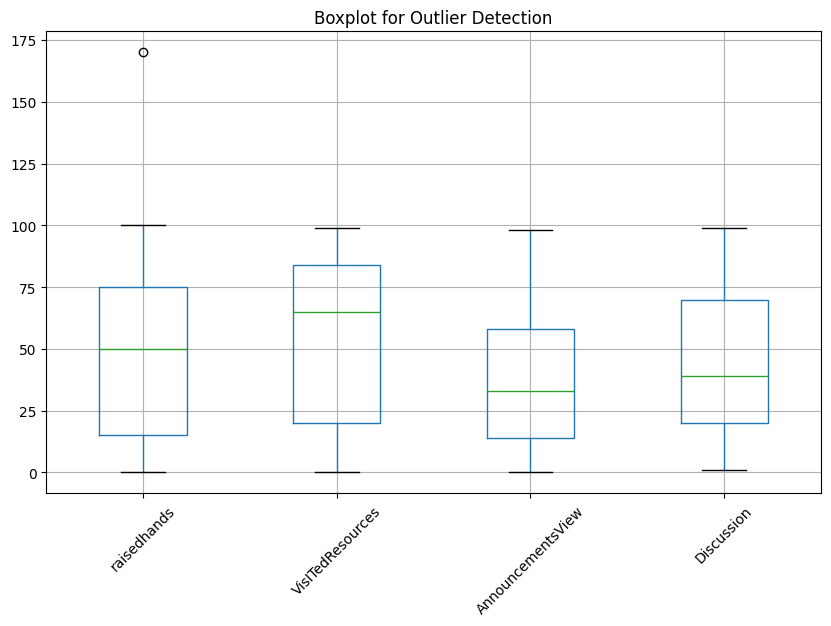

In [10]:
numeric_columns = academic_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
academic_df[numeric_columns].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [11]:
Q1 = academic_df[numeric_columns].quantile(0.25)
Q3 = academic_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1


In [12]:
academic_df = academic_df[~((academic_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (academic_df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [13]:
if 'Scores' in academic_df.columns:
    academic_df['Scores_log'] = np.log1p(academic_df['Scores'])
    
    # Plot before and after transformation
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.histplot(academic_df['Scores'], bins=20, kde=True, ax=ax[0])
    ax[0].set_title("Original Scores Distribution")
    sns.histplot(academic_df['Scores_log'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title("Log Transformed Scores Distribution")
    plt.show()

print("Data Processing Complete!")

Data Processing Complete!


C:\Users\HP\AppData\Local\Temp\ipykernel_13256\18711513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  academic_df['raisedhands_log'] = np.log1p(academic_df['raisedhands'])


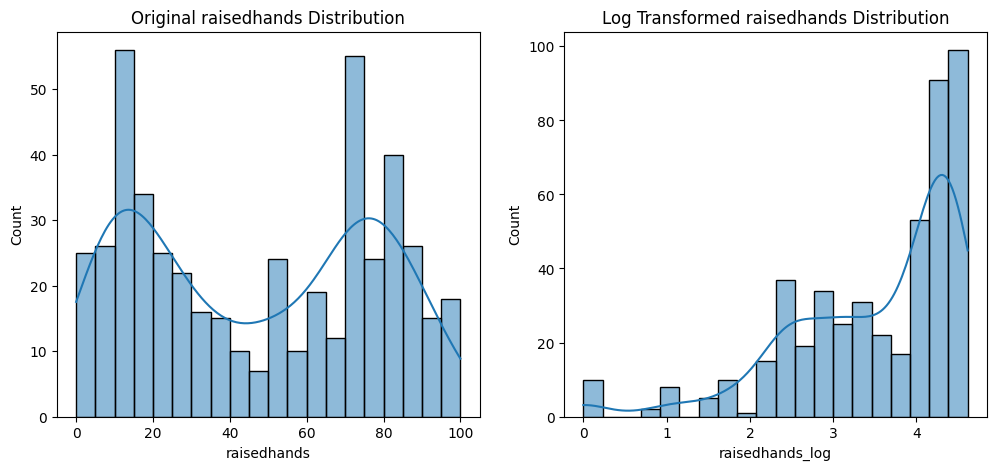

Data Processing Complete!


In [17]:
if 'raisedhands' in academic_df.columns:
    academic_df['raisedhands_log'] = np.log1p(academic_df['raisedhands'])

    # Plot before and after transformation
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sns.histplot(academic_df['raisedhands'], bins=20, kde=True, ax=ax[0])
    ax[0].set_title("Original raisedhands Distribution")
    sns.histplot(academic_df['raisedhands_log'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title("Log Transformed raisedhands Distribution")
    plt.show()
else:
    print("raisedhands column is missing!")

print("Data Processing Complete!")

In [16]:
print(academic_df.columns)


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
